In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\aozak\data_formation\mission_data\df_ok_cupidon\df_mission_data.csv"

df = pd.read_csv(path)

In [4]:
df.columns

Index(['index', 'age', 'status', 'sex', 'orientation', 'body_type', 'diet',
       'drinks', 'drugs', 'education', 'height', 'height_cm', 'income', 'job',
       'city', 'region', 'offspring', 'has_kids', 'wants_kids', 'smokes',
       'date', 'time', 'sign', 'astrology_sign', 'importance', 'ethnicity',
       'ethnicity_1', 'ethnicity_2', 'ethnicity_3', 'speaks', 'fluent', 'good',
       'pets', 'dogs', 'cats', 'religion', 'religion_name', 'seriousness',
       'age_group'],
      dtype='object')

In [20]:
# Remplacer dans "cats" si "pets" contient "dislikes cats"
df['cats'] = df.apply(lambda row: 'dislike' if 'dislikes cats' in row['pets'] else row['cats'], axis=1)

# Remplacer dans "dogs" si "pets" contient "dislikes dogs"
df['dogs'] = df.apply(lambda row: 'dislike' if 'dislikes dogs' in row['pets'] else row['dogs'], axis=1)

In [23]:
df["cats"].isna().sum()

0

In [24]:
df_hdv = df[['index', 'age_group', 'diet',
       'drinks', 'drugs', 'smokes', 'dogs', 'cats']]

In [26]:
df_hdv["dogs"].unique()

array(['like', 'no importance', 'own', 'dislike'], dtype=object)

In [27]:
age_group_mapping = {'18-24': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55-64': 4, '65+': 5}
drinks_mapping = {'not reported': 0, 'not at all': 1, 'rarely': 2, 'socially': 3, 
                  'often': 4, 'very often': 5, 'desperately': 6}
drugs_mapping = {'not reported': 0, 'never': 1, 'sometimes': 2, 'often': 3}
smokes_mapping = {'unknown': 0, 'no': 1, 'sometimes': 2, 'when drinking': 3, 
                  'trying to quit': 4, 'yes': 5}
dogs_mapping = {'dislike': 0, 'no importance': 1, 'like': 2, 'own': 3}
cats_mapping = {'dislike': 0, 'no importance': 1, 'like': 2, 'own': 3}

df_hdv["age_group"] = df_hdv["age_group"].map(age_group_mapping)
df_hdv["drinks"] = df_hdv["drinks"].map(drinks_mapping)
df_hdv["drugs"] = df_hdv["drugs"].map(drugs_mapping)
df_hdv["smokes"] = df_hdv["smokes"].map(smokes_mapping)
df_hdv["dogs"] = df_hdv["dogs"].map(dogs_mapping)
df_hdv["cats"] = df_hdv["cats"].map(cats_mapping)

C:\Users\aozak\AppData\Local\Temp\ipykernel_8272\3251154432.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdv["age_group"] = df_hdv["age_group"].map(age_group_mapping)
C:\Users\aozak\AppData\Local\Temp\ipykernel_8272\3251154432.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdv["drinks"] = df_hdv["drinks"].map(drinks_mapping)
C:\Users\aozak\AppData\Local\Temp\ipykernel_8272\3251154432.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [28]:
df_hdv

,index,age_group,diet,drinks,drugs,smokes,dogs,cats
0,0,0,anything,3,1,2,2,2
1,1,2,other,4,2,1,2,2
2,2,2,anything,3,0,1,1,3
3,3,0,vegetarian,3,0,1,1,2
4,4,1,anything,3,1,1,2,2
...,...,...,...,...,...,...,...,...
59913,59941,4,anything,3,1,1,3,1
59914,59942,1,anything,4,2,1,2,2
59915,59943,2,anything,1,1,1,1,1
59916,59944,1,anything,3,3,4,2,2


In [30]:
df_hdvs1 = pd.concat([df_hdv, pd.get_dummies(df_hdv['diet'], prefix='diet')], axis=1)

In [32]:
df_hdvs1.columns

Index(['index', 'age_group', 'diet', 'drinks', 'drugs', 'smokes', 'dogs',
       'cats', 'diet_anything', 'diet_halal', 'diet_kosher', 'diet_other',
       'diet_vegan', 'diet_vegetarian'],
      dtype='object')

In [33]:
df_hdvs1[['diet_anything', 'diet_halal', 'diet_kosher', 'diet_other',
       'diet_vegan', 'diet_vegetarian']] = df_hdvs1[['diet_anything', 'diet_halal', 'diet_kosher', 'diet_other',
       'diet_vegan', 'diet_vegetarian']].astype(int)

In [35]:
df_hdvs1 = df_hdvs1.drop(columns="diet")

In [37]:
df_hdvs1.columns

Index(['index', 'age_group', 'drinks', 'drugs', 'smokes', 'dogs', 'cats',
       'diet_anything', 'diet_halal', 'diet_kosher', 'diet_other',
       'diet_vegan', 'diet_vegetarian'],
      dtype='object')

In [38]:
X = df_hdvs1[['age_group', 'drinks', 'drugs', 'smokes', 'dogs', 'cats',
       'diet_anything', 'diet_halal', 'diet_kosher', 'diet_other',
       'diet_vegan', 'diet_vegetarian']]

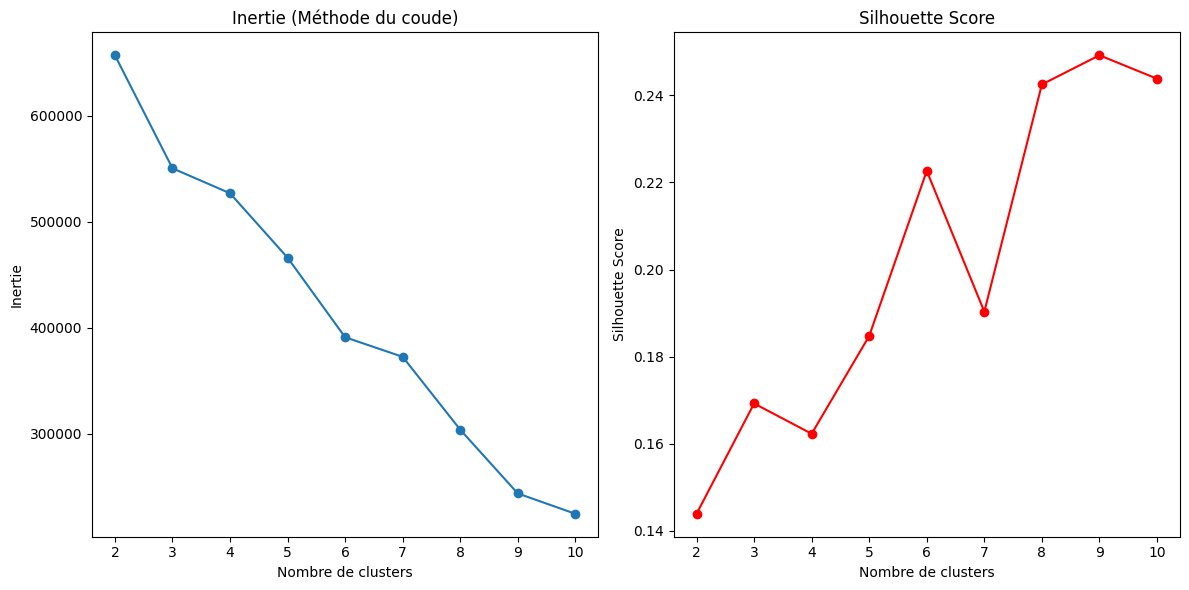

Le nombre optimal de clusters basé sur le silhouette score est : 9


In [41]:
# 1. Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Appliquer K-means pour différents nombres de clusters et calculer l'inertie et silhouette score
inertias = []
sil_scores = []
range_n_clusters = range(2, 11)  # Par exemple, essayer de 2 à 10 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    
    # Inertie (somme des distances au carré des points par rapport aux centres)
    inertias.append(kmeans.inertia_)
    
    # Silhouette score
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(sil_score)

# 3. Afficher l'inertie (méthode du coude) pour déterminer le nombre optimal de clusters
plt.figure(figsize=(12, 6))

# Inertie
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Inertie (Méthode du coude)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')

# Silhouette score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, sil_scores, marker='o', color='r')
plt.title('Silhouette Score')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# 4. Afficher le nombre optimal de clusters basé sur l'inertie et le silhouette score
optimal_k = range_n_clusters[sil_scores.index(max(sil_scores))]
print(f'Le nombre optimal de clusters basé sur le silhouette score est : {optimal_k}')


In [42]:
kmeans = KMeans(n_clusters=6, random_state=42)
df_hdvs1['cluster'] = kmeans.fit_predict(X_scaled)

In [45]:
df_hdvs1["cluster"].value_counts()

cluster
3    26549
0    19725
2     6056
1     5100
5     1786
4      702
Name: count, dtype: int64

In [51]:
df_hdvs2 = df_hdvs1[["index", "cluster"]]

In [59]:
df1 = pd.merge(df, df_hdvs2, on = "index", how = "inner")

In [60]:
df1 = df1.rename(columns={'cluster': 'categorie_hdv'})
path = r"C:\Users\aozak\data_formation\mission_data\df_ok_cupidon\df_mission_data.csv"
#df1.to_csv(path, index = False)

In [61]:
# Définir les bornes des tranches
bins = [119, 140, 150, 160, 170, 180, 190, float('inf')]

# Définir les labels correspondants aux tranches
labels = ["119 cm - 140 cm", "141 cm - 150 cm", "151 cm - 160 cm", "161 cm - 170 cm", "171 cm - 180 cm", "181 cm - 190 cm", "191 cm et plus"]

# Appliquer les tranches à la colonne 'height_cm'
df1['height_category'] = pd.cut(df1['height_cm'], bins=bins, labels=labels, right=False)

# Afficher le DataFrame avec les nouvelles catégories

In [63]:
df1.columns

Index(['index', 'age', 'status', 'sex', 'orientation', 'body_type', 'diet',
       'drinks', 'drugs', 'education', 'height', 'height_cm', 'income', 'job',
       'city', 'region', 'offspring', 'has_kids', 'wants_kids', 'smokes',
       'date', 'time', 'sign', 'astrology_sign', 'importance', 'ethnicity',
       'ethnicity_1', 'ethnicity_2', 'ethnicity_3', 'speaks', 'fluent', 'good',
       'pets', 'dogs', 'cats', 'religion', 'religion_name', 'seriousness',
       'age_group', 'categorie_hdv', 'height_category'],
      dtype='object')

In [69]:
df_body = df1[['index','ethnicity', 'height_category', 'body_type']]

In [71]:
df_body

,index,ethnicity,height_category,body_type
0,0,"asian, white",191 cm et plus,a little extra
1,1,white,171 cm - 180 cm,average
2,2,rather not disclose,171 cm - 180 cm,thin
3,3,white,181 cm - 190 cm,thin
4,4,"asian, black, other",161 cm - 170 cm,athletic
...,...,...,...,...
59913,59941,rather not disclose,151 cm - 160 cm,rather not say
59914,59942,"white, other",181 cm - 190 cm,fit
59915,59943,asian,181 cm - 190 cm,average
59916,59944,"asian, black",181 cm - 190 cm,athletic


In [72]:
body_type_mapping = {
    'rather not say': 0,
    'jacked': 1,
    'athletic': 2,
    'fit': 3,
    'curvy': 4,
    'a little extra': 5,
    'average': 6,
    'skinny': 7,
    'overweight': 8,
    'full figured': 9,
    'used up': 10
}

# Appliquer le mappage sur la colonne 'body_type'
df_body['body_type_mapped'] = df_body['body_type'].map(body_type_mapping)

C:\Users\aozak\AppData\Local\Temp\ipykernel_8272\3102777900.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_body['body_type_mapped'] = df_body['body_type'].map(body_type_mapping)


In [75]:
df_body["body_type"].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit',
       'rather not say', 'skinny', 'curvy', 'full figured', 'jacked',
       'used up', 'overweight'], dtype=object)

In [76]:
# Créer un dictionnaire qui mappe chaque body_type à une valeur numérique
body_type_mapping = {
    'fit': 0,
    'athletic': 1,
    'jacked': 2,
    'curvy': 3,
    'a little extra': 4,
    'average': 5,
    'thin': 6,
    'skinny': 7,
    'full figured': 8,
    'overweight': 9,
    'used up': 10,
    'rather not say': 11
}

# Appliquer le mappage sur la colonne 'body_type'
df_body['body_type_mapped'] = df_body['body_type'].map(body_type_mapping)

C:\Users\aozak\AppData\Local\Temp\ipykernel_8272\3812689148.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_body['body_type_mapped'] = df_body['body_type'].map(body_type_mapping)


In [80]:
df_body["height_category"].value_counts()

height_category
171 cm - 180 cm    22055
181 cm - 190 cm    15503
161 cm - 170 cm    15185
151 cm - 160 cm     4337
191 cm et plus      2738
141 cm - 150 cm       84
119 cm - 140 cm       16
Name: count, dtype: int64

In [81]:
# Créer un dictionnaire qui mappe chaque height_category à une valeur numérique
height_category_mapping = {
    '119 cm - 140 cm': 0,
    '141 cm - 150 cm': 1,
    '151 cm - 160 cm': 2,
    '161 cm - 170 cm': 3,
    '171 cm - 180 cm': 4,
    '181 cm - 190 cm': 5,
    '191 cm et plus': 6
}

# Appliquer le mappage sur la colonne 'height_category'
df_body['height_category_mapped'] = df_body['height_category'].map(height_category_mapping)


C:\Users\aozak\AppData\Local\Temp\ipykernel_8272\4228880384.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_body['height_category_mapped'] = df_body['height_category'].map(height_category_mapping)


In [85]:
df_body

,index,ethnicity,height_category,body_type,body_type_mapped,height_category_mapped
0,0,"asian, white",191 cm et plus,a little extra,4,6
1,1,white,171 cm - 180 cm,average,5,4
2,2,rather not disclose,171 cm - 180 cm,thin,6,4
3,3,white,181 cm - 190 cm,thin,6,5
4,4,"asian, black, other",161 cm - 170 cm,athletic,1,3
...,...,...,...,...,...,...
59913,59941,rather not disclose,151 cm - 160 cm,rather not say,11,2
59914,59942,"white, other",181 cm - 190 cm,fit,0,5
59915,59943,asian,181 cm - 190 cm,average,5,5
59916,59944,"asian, black",181 cm - 190 cm,athletic,1,5
